# **Heisenberg Uncertainty Visualization**

This project demonstrates the **Heisenberg Uncertainty Principle** using **coherent states** and **squeezed states** in quantum mechanics. The visualization illustrates the trade-off between the uncertainties in position ($\Delta x$) and momentum ($\Delta p$) for quantum states, highlighting their mathematical and physical significance.

The Heisenberg Uncertainty Principle is a cornerstone of quantum mechanics. It states that the product of the uncertainties in position ($\Delta x$) and momentum ($\Delta p$) for a particle is bounded by:

$$
\Delta x \cdot \Delta p \geq \frac{\hbar}{2}.
$$


- **Coherent states**: States with minimum uncertainty.
- **Squeezed states**: States where uncertainties are unequally distributed between position and momentum.

---

## **Key Concepts**

### 1. **Coherent States**
- Gaussian wave packets with symmetric uncertainties.
- Minimal uncertainty product: $\Delta x \cdot \Delta p = \frac{\hbar}{2}$.

### 2. **Squeezed States**
- Modified Gaussian states where one uncertainty is reduced at the cost of the other.
- Still satisfies the uncertainty relation: $\Delta x \cdot \Delta p \geq \frac{\hbar}{2}$.

### 3. **Fourier Transforms**
- Used to calculate the momentum-space wavefunction from the position-space wavefunction.


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Constants
hbar = 1.0  # reduced Plancks constant
m = 1.0  # mass
omega = 1.0  # angular frequency
sigma = np.sqrt(hbar / (2 * m * omega))  # standard Gaussian width

In [22]:
x_min, x_max, N = -10, 10, 1024
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]
p = np.fft.fftfreq(N, d=dx) * 2 * np.pi
dp = p[1] - p[0]

### Coherent States
- Constructs Gaussian wavefunctions in position and momentum space.

In [23]:
psi_coherent = (1 / np.sqrt(np.sqrt(np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

### Squeezed States
- Generates modified wavefunctions with unequal uncertainties.

In [24]:
r = 1.0  # Squeezing parameter
sigma_x = sigma * np.exp(-r)
sigma_p = sigma * np.exp(r)
psi_squeezed = (1 / np.sqrt(np.sqrt(np.pi) * sigma_x)) * np.exp(-x**2 / (2 * sigma_x**2))

In [25]:
# momentum space wavefunctions (via Fourier transform)
psi_coherent_p = np.fft.fftshift(np.fft.fft(np.fft.fftshift(psi_coherent))) * dx
psi_squeezed_p = np.fft.fftshift(np.fft.fft(np.fft.fftshift(psi_squeezed))) * dx

In [26]:
# normalization in momentum space
psi_coherent_p = psi_coherent_p / np.sqrt(np.sum(np.abs(psi_coherent_p)**2 * dp))
psi_squeezed_p = psi_squeezed_p / np.sqrt(np.sum(np.abs(psi_squeezed_p)**2 * dp))


In [27]:
# calculating uncertainties
delta_x_coherent = np.sqrt(np.sum(x**2 * np.abs(psi_coherent)**2 * dx) - (np.sum(x * np.abs(psi_coherent)**2 * dx))**2)
delta_p_coherent = np.sqrt(np.sum(p**2 * np.abs(psi_coherent_p)**2 * dp) - (np.sum(p * np.abs(psi_coherent_p)**2 * dp))**2)

delta_x_squeezed = np.sqrt(np.sum(x**2 * np.abs(psi_squeezed)**2 * dx) - (np.sum(x * np.abs(psi_squeezed)**2 * dx))**2)
delta_p_squeezed = np.sqrt(np.sum(p**2 * np.abs(psi_squeezed_p)**2 * dp) - (np.sum(p * np.abs(psi_squeezed_p)**2 * dp))**2)

### Visualization


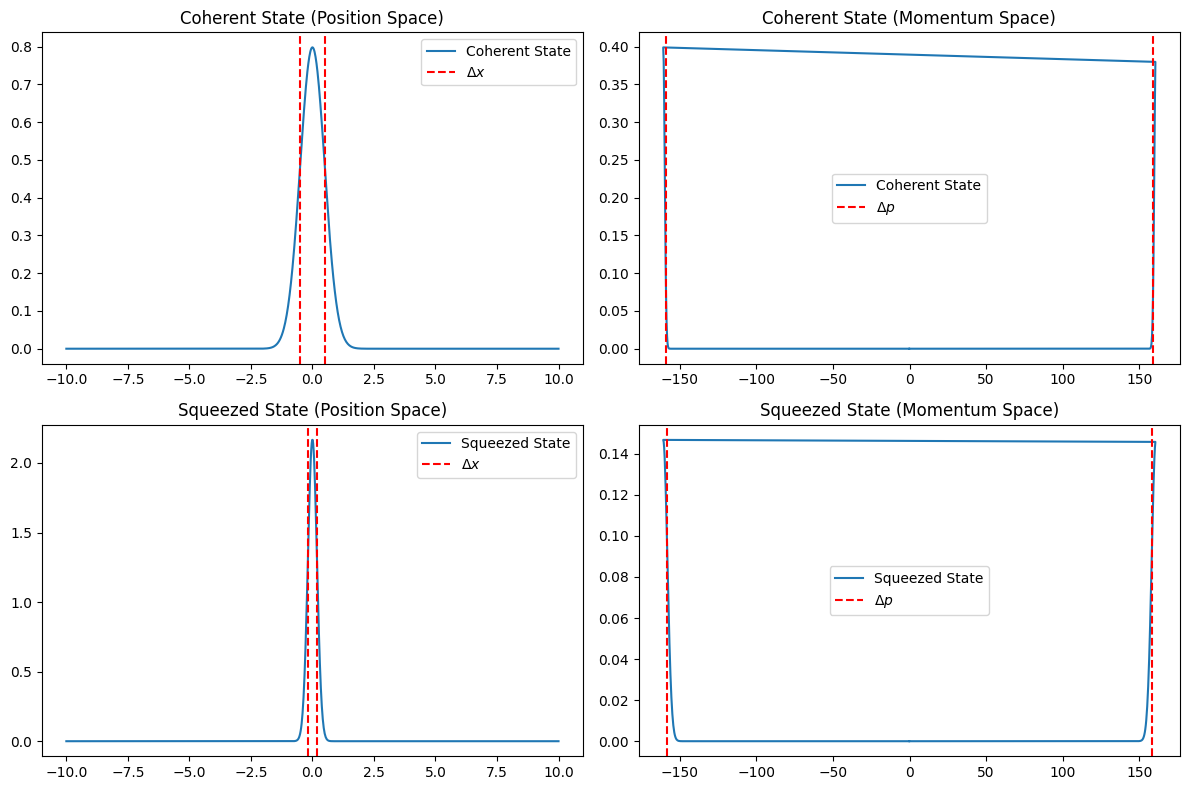

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Coherent state in position and momentum space
ax[0, 0].plot(x, np.abs(psi_coherent)**2, label="Coherent State")
ax[0, 0].axvline(delta_x_coherent, color='r', linestyle='--', label=r'$\Delta x$')
ax[0, 0].axvline(-delta_x_coherent, color='r', linestyle='--')
ax[0, 0].set_title("Coherent State (Position Space)")
ax[0, 0].legend()

ax[0, 1].plot(p, np.abs(psi_coherent_p)**2, label="Coherent State")
ax[0, 1].axvline(delta_p_coherent, color='r', linestyle='--', label=r'$\Delta p$')
ax[0, 1].axvline(-delta_p_coherent, color='r', linestyle='--')
ax[0, 1].set_title("Coherent State (Momentum Space)")
ax[0, 1].legend()


# squeezed state in position and momentum space
ax[1, 0].plot(x, np.abs(psi_squeezed)**2, label="Squeezed State")
ax[1, 0].axvline(delta_x_squeezed, color='r', linestyle='--', label=r'$\Delta x$')
ax[1, 0].axvline(-delta_x_squeezed, color='r', linestyle='--')
ax[1, 0].set_title("Squeezed State (Position Space)")
ax[1, 0].legend()
ax[1, 1].plot(p, np.abs(psi_squeezed_p)**2, label="Squeezed State")
ax[1, 1].axvline(delta_p_squeezed, color='r', linestyle='--', label=r'$\Delta p$')
ax[1, 1].axvline(-delta_p_squeezed, color='r', linestyle='--')
ax[1, 1].set_title("Squeezed State (Momentum Space)")
ax[1, 1].legend()

plt.tight_layout()
plt.show()
